# Brent Oil Prices Analysis

## Importing Libraries

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from src.utils import check_missing_data
from src.descriptive_statistics import describe_numerical, summarize_time
from src.plots import display_summary_table, plot_histogram, plot_time_series
import ruptures as rpt
import matplotlib.pyplot as plt

## Data Analysis Workflow

### Data Understanding and Preprocessing

#### Load Data

In [2]:
# Load the dataset
df = pd.read_csv('../data/BrentOilPrices.csv')

In [3]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


#### Checking missing values

In [4]:
check_missing_data(df)

'Success: No missing values.'

In [5]:
print(len(df))

9011


#### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\abraham.shimelis\AppData\Local\Temp\ipykernel_6428\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB


### Exploratory Data Analysis

#### Data Summerization

In [9]:
summarize_time(df, "Date")

Number of Unique Dates: 9011
Start Date: 1987-05-20 00:00:00
End Date: 2022-11-14 00:00:00


In [10]:
df_num = df[['Price']]
num_desc = describe_numerical(df_num)

In [11]:
display_summary_table(num_desc)


Price:
+----+---------+-----------+
|    | index   |     Price |
|----+---------+-----------|
|  0 | count   | 9011      |
|  1 | mean    |   48.4208 |
|  2 | std     |   32.8601 |
|  3 | min     |    9.1    |
|  4 | 25%     |   19.05   |
|  5 | 50%     |   38.57   |
|  6 | 75%     |   70.09   |
|  7 | max     |  143.95   |
+----+---------+-----------+


#### Univariate analysis 

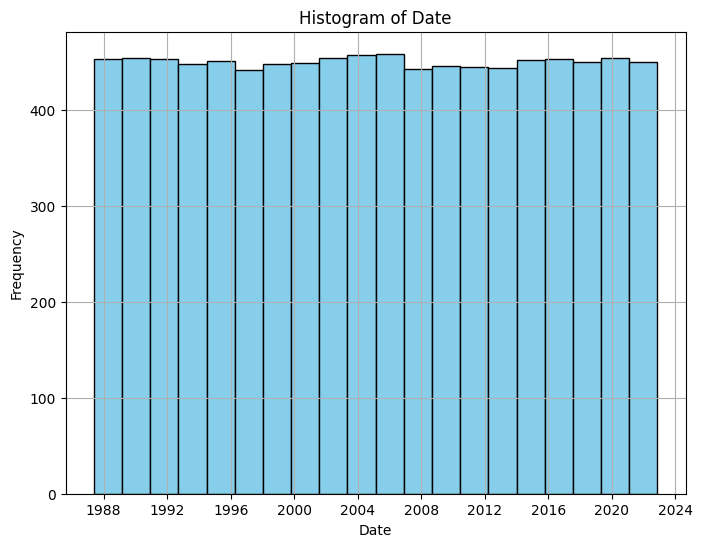

In [12]:
plot_histogram(df, 'Date')

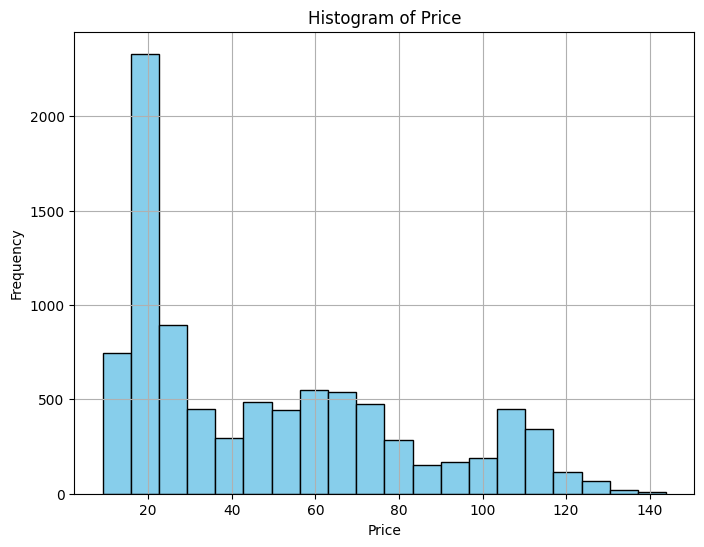

In [13]:
plot_histogram(df, 'Price')

#### Bivariate analysis

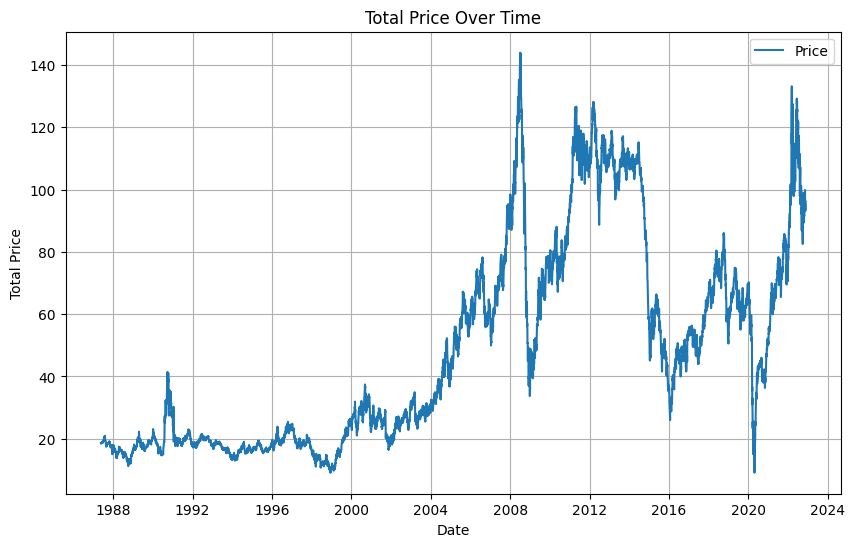

In [14]:
plot_time_series(df, 'Date', 'Price')

### Chagen Point Detection

#### Change point detection

In [15]:
signal = df['Price'].values
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

#### Plot change points

C:\Users\abraham.shimelis\AppData\Local\Temp\ipykernel_6428\3480377804.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


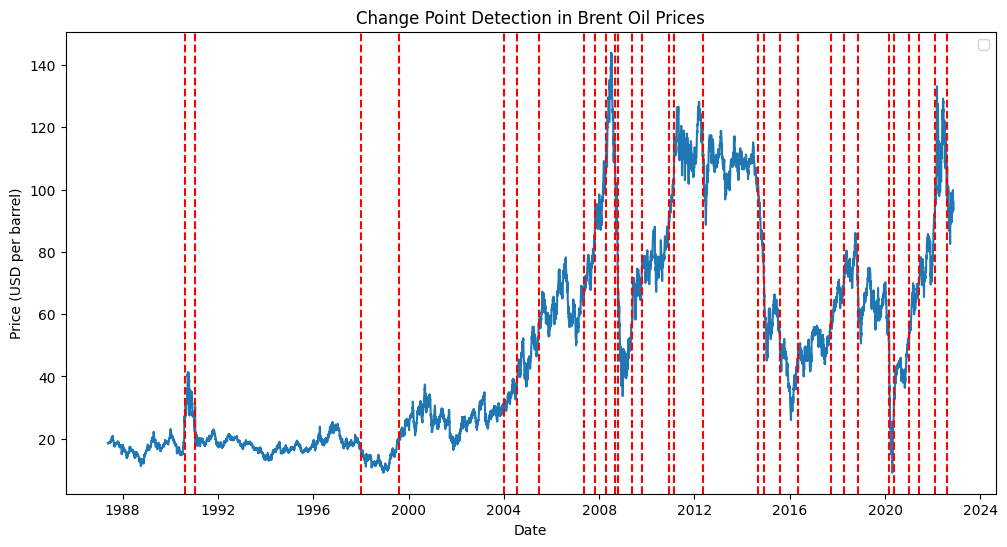

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'])
for cp in result:
    if cp < len(df):
        plt.axvline(df['Date'][cp], color='r', linestyle='--')
plt.title('Change Point Detection in Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

#### Extract change point dates and prices and save to csv

In [17]:
# Extract change point dates and prices
change_points = df.iloc[result[:-1]]  # Exclude the last point as it is the end of the time series
change_points = change_points[['Date', 'Price']]

In [18]:
# Save to CSV
change_points.to_csv('../data/BrentOilPrices_ChangePoints.csv', index=False)

In [19]:
# Load the dataset
change_points_df = pd.read_csv('../data/BrentOilPrices_ChangePoints.csv')

In [22]:
change_points_df.head(30)

,Date,Price
0,1990-08-06,27.28
1,1991-01-16,30.28
2,1997-12-29,16.35
3,1999-08-09,19.34
4,2003-12-29,29.17
5,2004-07-27,40.09
6,2005-06-16,54.30
7,2007-05-18,69.26
8,2007-10-24,83.47
9,2008-04-11,107.15


In [21]:
print(len(change_points_df))

30


## Bayesian Inference and Statistical Modeling